In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print("Python list operations:")
a = [1,2,3]
b = [4,5,6]
print("a+b:", a+b)
try:
    print(a*b)
except TypeError:
    print("a*b has no meaning for python lists")
print()
print("numpy array operations")
a = np.array([1,2,3])
b = np.array([4,5,6])
print("a+b:", a+b)
print("a*b:", a*b)

Python list operations:
a+b: [1, 2, 3, 4, 5, 6]
a*b has no meaning for python lists

numpy array operations
a+b: [5 7 9]
a*b: [ 4 10 18]


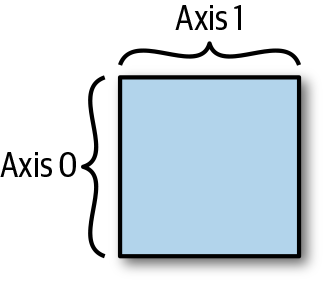

Figure 1-3: A 2D NumPy array, with axis=0 as the rows and axis=1 as the columns.

In [7]:
a = np.array([[1,2],
              [3,4]])
print('a:')
print(a)
print('a.sum(axis=0):', a.sum(axis=0))
print('a.sum(axis=1):', a.sum(axis=1))

a:
[[1 2]
 [3 4]]
a.sum(axis=0): [4 6]
a.sum(axis=1): [3 7]


In [8]:
a = np.array([[1,2,3],
             [4,5,6]])

b = np.array([10,20,30])

print("a+b:\n", a+b)

a+b:
 [[11 22 33]
 [14 25 36]]


In [9]:
def __init__(self,
             layers: List[Layer],
             loss: Loss,
             learning_rate: float = 0.01) -> None:
    pass

NameError: name 'List' is not defined

In [10]:
def operation(x1, x2):
    pass

In [ ]:
def operation(x1: np.ndarray, x2: np.ndarray) -> np.ndarray:
    pass

NameError: name 'ndarray' is not defined

In [17]:
def square(x: np.ndarray) -> np.ndarray:
    '''
    Square each element in the input ndarray.
    '''
    return np.power(x, 2)

def leaky_relu(x: np.ndarray) -> np.ndarray:
    '''
    Apply "Leaky ReLU function to each element in ndarray"
    '''
    return np.maximum(0.2 * x, x)

$$\frac{df}{du}(a) = \lim_{\Delta \to 0} \frac{f(a + \Delta) - f(a - \Delta)}{2 \times \Delta}$$

$$\frac{df}{du}(a) = \lim_{\Delta \to 0} \frac{f(a + 0.001) - f(a - 0.001)}{0.002}$$

In [18]:
from typing import Callable

def deriv(func: Callable[[np.ndarray], np.ndarray],
          input_: np.ndarray,
          delta: float = 0.001) -> np.ndarray:
    '''
    Evaluates the derivative of a function "func" at every 
    element in the "input_" array.
    '''
    return (func(input_ + delta) - func(input_ - delta)) / (2 * delta)

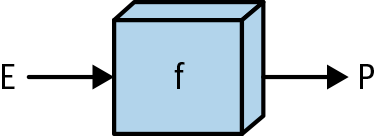

In [19]:
def f(input_: np.ndarray) -> np.ndarray:
    # Some transformation(s)
    output = 123
    return output

P = f(E)

NameError: name 'E' is not defined

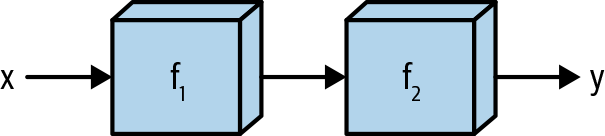

Figure 1-6. Nested functions, naturally

$$f_2(f_1(x)) = y$$

In [20]:
from typing import List

# a function that takes in an ndarray as an argument and produces an ndarray
Array_Function = Callable[[np.ndarray], np.ndarray]

# A chain is a list of functions
Chain = List[Array_Function]

Then we will define how data goes through a chain, first of length 2:

In [21]:
def chain_length_2(chain: Chain,
                   a: np.ndarray) -> np.ndarray:
    '''
    Evaluates two functions in a row, in a "Chain".
    '''
    assert len(chain) == 2, \
    "Lenght of input 'chain' should be 2"

    f1 = chain[0]
    f2 = chain[1]

    return f2(f1(x))

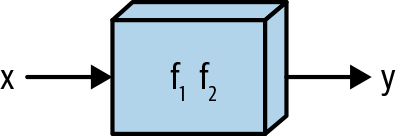

Figure 1-7: Another way to think of nested functions

$$\frac{df_2}{du}(x) = \frac{df_2}{du}(f_1(x)) \times \frac{df_1}{du}(x)$$

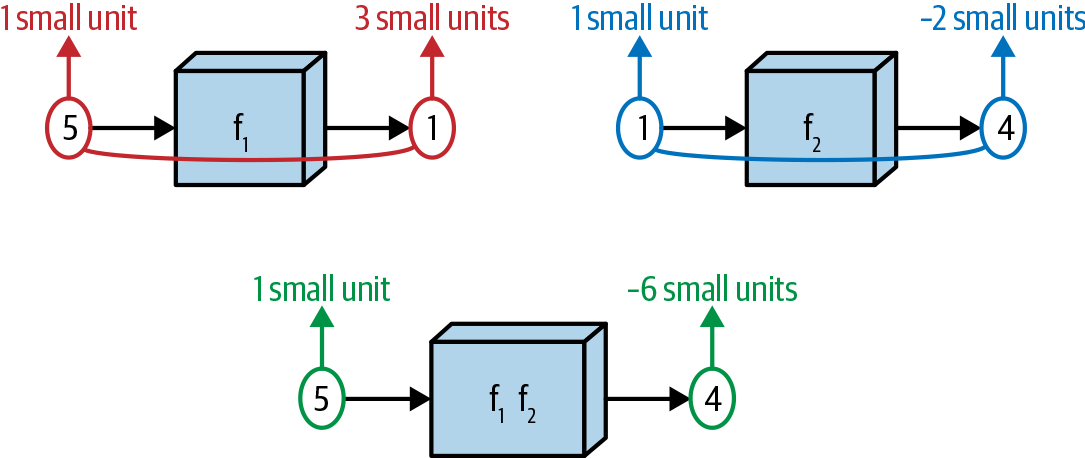

Figure 1-8. An illustration of chain rule

In [ ]:
def sigmoid(x: np.ndarray) -> np.ndarray:
    '''
    Apply the sigmoid function to each element in the input 
    ndarray.
    '''
    return 1 / (1 + np.exp(-x))

And now we code up the chain rule.

In [24]:
def chain_deriv_2(chain: Chain,
                  input_range: np.ndarray) -> np.ndarray:
    '''
    Uses the chain rule to compute the derivative of two nested
    functions: (f2(f1(x))' = f2'(f1(x)) * f1'(x)
    '''

    assert len(chain) == 2, \
    "This function requires 'Chain' objects of length 2"

    assert input_range.ndim == 1, \
    "Function requires a 1 dimensional ndarray as input_range"

    f1 = chain[0]
    f2 = chain[1]

    # df1/dx
    f1_of_x = f1(input_range)

    # df1/du
    df1dx = deriv(f1, input_range)

    # df2/du(f1(x))
    df2du = deriv(f2, f1(input_range))

    # Multiplying these quantities together at each point
    return df1dx * df2du

In [ ]:
PLOT_RANGE = np.arange(-3, 3, 0.01)

chain_1 = [square, sigmoid]
chain_2 = [sigmoid, square]

plot_chain(chain_1)